# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems. A classification is where you try to classify something as one thing or another, whereas a regression is where you try to predict a number.

A few example classification problems include:
* Binary classification - is this a cat or a dog?
* Multiclass classification - is this a dog, cat or hamster?
* Multilabel classification - is this a dog, cat or both?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist


In [2]:
# Make 1000 circles examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:20]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0])

In [5]:
# Creating a dataframe out of our circles
df = pd.DataFrame({'X0':X[:,0], "X1":X[:,1], "label":y})
df.head(10)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


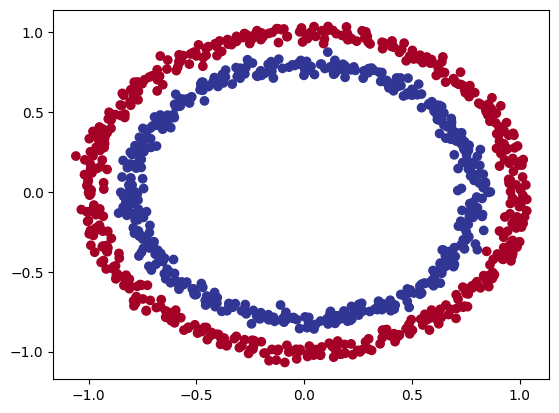

In [6]:
# visualise with a plot
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [7]:
# Checking the shapes of the features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X[18], y[18]

(array([-0.81891362, -0.10162399]), 1)

In [9]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=['accuracy'])

# Fit the model
model.fit(X, y, epochs=5)

Metal device set to: Apple M2

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Epoch 1/5


2023-07-25 15:45:10.763441: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 8ms/step - loss: 2.3596 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7371 - accuracy: 0.5060
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7069 - accuracy: 0.4970
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6981 - accuracy: 0.5020
Epoch 5/5
32/32 [==============================] - 0s 6ms/step - loss: 0.6955 - accuracy: 0.5020


In [10]:
# train for longer to improve our model
model.fit(X, y, epochs=200, verbose=0)

In [11]:
model.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

**Not performing well enough as the accuracy is 50%**

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.SGD(),
              metrics=['accuracy'])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932719945907593, 0.5]

**Not working.......**

## Imporving the model

Tricks to improve a classification model:
* **Adding more layers** - If you want your model to learn more complex patterns, you can add more layers (e.g. GlobalAveragePooling2D or more Conv2D layers).
* **Increasing the number of hidden units** - The number of hidden units is a parameter you can tweak (similar to learning rate) which controls how many patterns your model learns.
* **Change the activation functions** - There are many different activation functions you can choose from, each has their own pros and cons.
* **Change the optimization function** - Whilst the Adam optimizer is a good default choice, you might want to try something like stochastic gradient descent (SGD) or RMSprop optimizer.
* **Fitting on more data** - This might sound obvious but the more data your model is fit on, the better chance it has to learn the patterns within the data.
* **Fitting for longer** - Along with more data, a model has a better chance of learning the patterns in the data when it has seen it multiple times. This is controlled by the epochs parameter.

In [14]:
# Adding an extra layer and changing the optimizer 

# Set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=['accuracy'])

# Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.6993 - accuracy: 0.5120


[0.6993108987808228, 0.5120000243186951]

In [16]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if y_pred.shape[1] > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


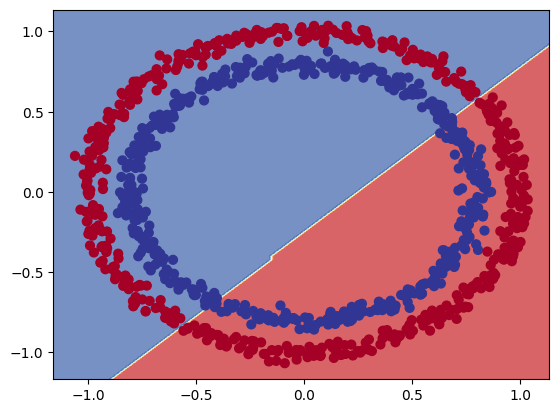

In [17]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [18]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history = model_4.fit(X, y, epochs=100, verbose=0) 

In [19]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 0.7093 - accuracy: 0.4340


[0.709257185459137, 0.4339999854564667]

313/313 [==============================] - 0s 1ms/step
doing binary classification


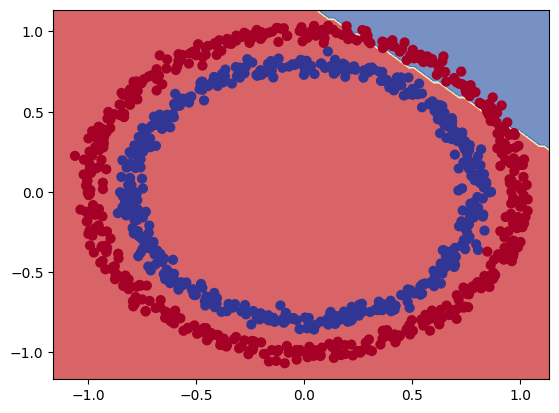

In [20]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4, X=X, y=y)

## Non-linearity

The combination of **linear(straight lines) and non-linear(curves) functions** is one of the key ingredients which makes neural networks so powerful.

In [21]:
# Build the neural network with a non-linear activation
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_1 = model_5.fit(X, y, epochs=100, verbose=0) 

In [22]:
model_5.evaluate(X, y)

32/32 [==============================] - 0s 6ms/step - loss: 4.5118 - accuracy: 0.4650


[4.511790752410889, 0.4650000035762787]

In [23]:
# https://playground.tensorflow.org/
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

history_2 = model_6.fit(X, y, epochs=250, verbose=0)

In [24]:
model_6.evaluate(X, y)

32/32 [==============================] - 0s 7ms/step - loss: 0.0691 - accuracy: 0.9890


[0.06913312524557114, 0.9890000224113464]

313/313 [==============================] - 1s 3ms/step
doing binary classification


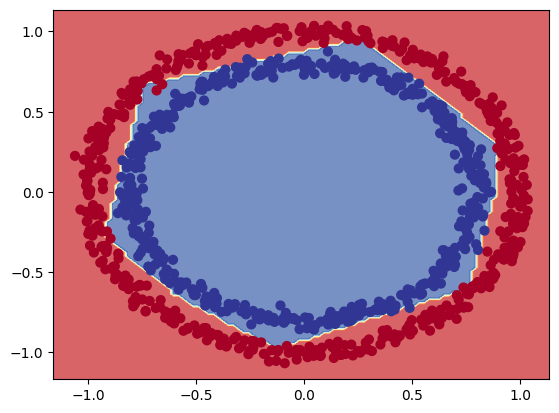

In [25]:
plot_decision_boundary(model=model_6, X=X, y=y)

## Evaluating and Improving our classification model

When it comes to evaluation classification models, there are a few different metrics we want to look at:
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Confusion matrix** - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

In [26]:
# So far we've been training and testing on the same dataset
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [28]:
tf.random.set_seed(42)
# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
                metrics=['accuracy'])
# Fit the model
history_3 = model_7.fit(X_train, y_train, epochs=50)

Epoch 1/50


/Users/oabas/miniconda3/lib/python3.9/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


25/25 [==============================] - 1s 10ms/step - loss: 0.6941 - accuracy: 0.5088
Epoch 2/50
25/25 [==============================] - 0s 7ms/step - loss: 0.6817 - accuracy: 0.5625
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6772 - accuracy: 0.5562
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6712 - accuracy: 0.5612
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6618 - accuracy: 0.6000
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6384 - accuracy: 0.5975
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6081 - accuracy: 0.7600
Epoch 8/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5758 - accuracy: 0.7337
Epoch 9/50
25/25 [==============================] - 0s 6ms/step - loss: 0.5268 - accuracy: 0.8188
Epoch 10/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4677 - accuracy: 0.8700
Epoch 11/50
25/25 [==========

In [29]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 19ms/step - loss: 0.0232 - accuracy: 0.9950


[0.023202626034617424, 0.9950000047683716]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


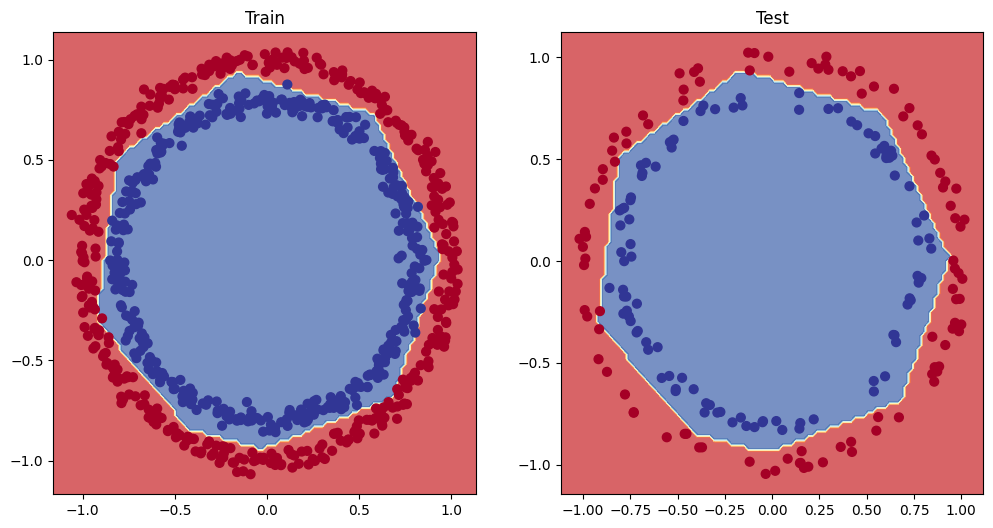

In [31]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_7, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_7, X=X_test, y=y_test)
plt.show();

In [45]:
# Accuracy and loss output
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 25ms/step - loss: 0.0232 - accuracy: 0.9950
Model loss on the test set: 0.023202626034617424
Model accuracy on the test set: 99.50%


In [47]:
# Make predictions
y_preds = model_7.predict(X_test) # note: this is in prediction probabilities form
y_preds[:10]

7/7 [==============================] - 0s 7ms/step


array([[9.8933840e-01],
       [9.9940968e-01],
       [9.8753577e-01],
       [9.9928892e-01],
       [4.2150859e-02],
       [2.2991060e-03],
       [9.9879956e-01],
       [1.7141244e-04],
       [9.9614727e-01],
       [4.8532216e-05]], dtype=float32)

In [48]:
# Convert the prediction probabilities to binary format and view the first 10
y_preds = tf.round(y_preds)
y_preds[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [49]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_preds)

array([[100,   1],
       [  0,  99]])

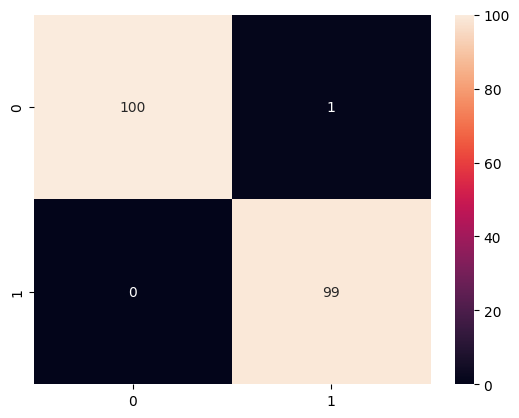

In [51]:
# Visualise confusion matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
confusion_matrix = confusion_matrix(y_test, y_preds)  # calculate the confusion matrix

# Create heatmap
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.show()

## Plot the loss (or training) curves

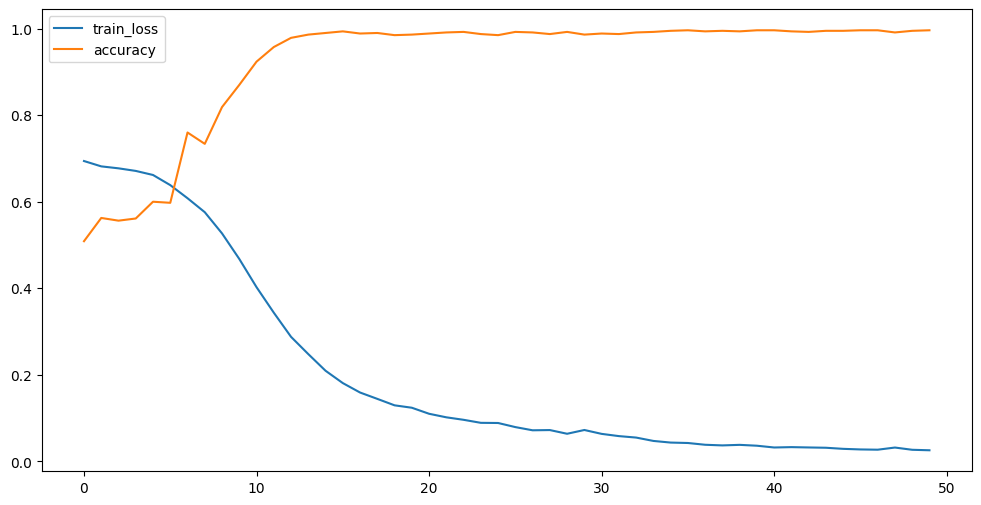

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(history_3.history['loss'], label='train_loss')
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.legend()
plt.show();

## Finding the best learning rate

A learning rate is one of the most important hyperparameters you can tune for your model. To find the ideal learning rate (one where the model converges quickly and with a high accuracy), you can use the following steps: 
* A learning rate **callback** - you can use the TensorBoard callback to log the learning rate, then interpret the results in TensorBoard (we'll see this in code soon).
* The learning rate finder - a model agnostic technique for finding the optimal learning rate for your model given your dataset.
* Visualize and experiment - once you've got results using the above two, you can visualize them and pick a learning rate to train your model with.

### The learning rate callback

In [36]:
tf.random.set_seed(42)
# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])
# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# Fit the model
history_4 =  model_8.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler], verbose=0)

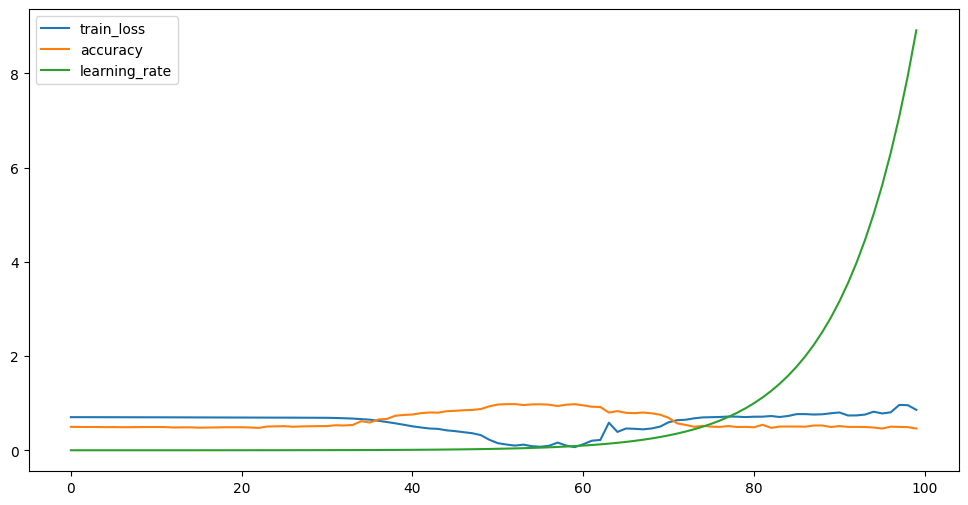

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(history_4.history['loss'], label='train_loss')
plt.plot(history_4.history['accuracy'], label='accuracy')
plt.plot(history_4.history['lr'], label='learning_rate')
plt.legend()
plt.show();

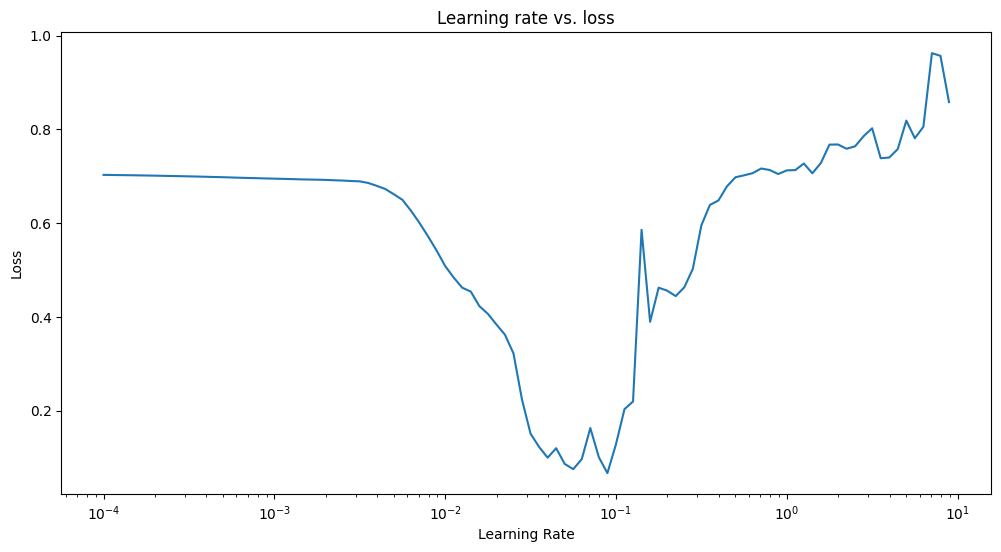

In [39]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(12, 6))
plt.semilogx(lrs, history_4.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss")
plt.show()

**Ideal learning is somewhere between the fastest decrease in loss and the lowest loss. This can be found using the TensorBoard callback.**

In [42]:
# Let's try using the ideal learning rate with our model and see how it goes
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_9.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=['accuracy'])

history_5 = model_9.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
25/25 [==============================] - 1s 9ms/step - loss: 0.6905 - accuracy: 0.4913
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6818 - accuracy: 0.5713
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6683 - accuracy: 0.5763
Epoch 4/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6498 - accuracy: 0.6037
Epoch 5/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6296 - accuracy: 0.6475
Epoch 6/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5804 - accuracy: 0.7250
Epoch 7/20
25/25 [==============================] - 0s 6ms/step - loss: 0.5171 - accuracy: 0.7912
Epoch 8/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4471 - accuracy: 0.8213
Epoch 9/20
25/25 [==============================] - 0s 6ms/step - loss: 0.3318 - accuracy: 0.8938
Epoch 10/20
25/25 [==============================] - 0s 6ms/step - loss: 0.2004 - accuracy: 0.9663
Epoch 11/20
25/25 [

In [43]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 1s 21ms/step - loss: 0.0286 - accuracy: 0.9950


[0.028553301468491554, 0.9950000047683716]

In [44]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 18ms/step - loss: 0.0232 - accuracy: 0.9950


[0.023202626034617424, 0.9950000047683716]

## Multiclass classification

When you have more than 2 classes to classify, it's known as multiclass classification. For example, classifying images of different dog breeds.

In [2]:
# Import Fashion MNIST dataset - The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
# Show the first training example
print(f"Training Sample:\n{train_data[0]}\n")
print(f"Training Label:\n{train_labels[0]}\n")

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

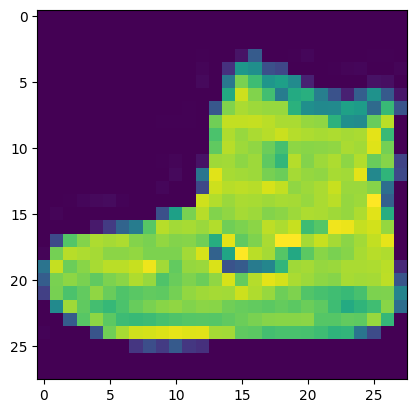

In [9]:
# Plot a single sample
plt.imshow(train_data[0]);

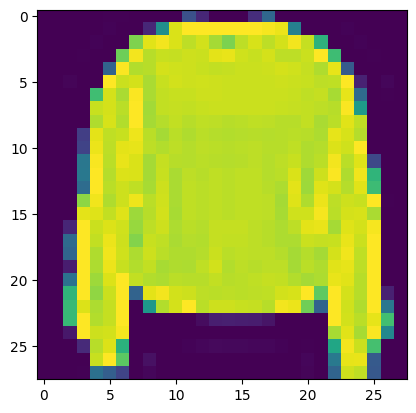

In [8]:
plt.imshow(train_data[7]);

In [11]:
# Create a small list so as to index onto the training labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']
len(class_names)

10

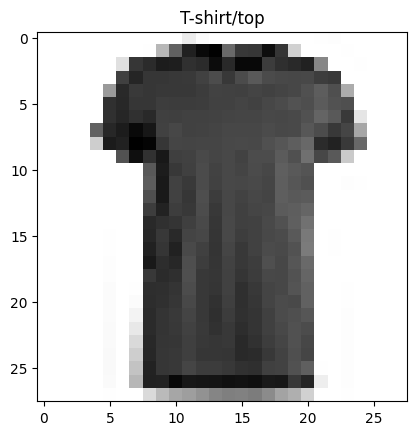

In [13]:
# Plot an example image and its label.
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]])
plt.show()

### Building a Multiclass classification model 

For the multiclass classification model, we can use a similar architecture to out binary classifiers, however, we will need to change 

* The Input shaper to accept the 28x28 images
* The output shape to be 10 (one per class of clothing)
* The Loss function to be `tf.keras.losses.CategoricalCrossentropy()`
* The output activation function to be `tf.keras.activations.softmax`

In [16]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # Flatten the input (28, 28) image and make it a (,784) vector
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Since the training data is in integer form, we use SparseCategoricalCrossentropy()
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=["accuracy"])  

history_10 = model_10.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=100, verbose=0)

In [18]:
model_10.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 4)                 3140      
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


**NOTE**: `Neural Networks` prefer data to be scaled(or normalized) to a small range like 0 to 1.

In [19]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [20]:
# Checking the min and max values of the scaled data
train_data.min(), train_data.max(), train_data_norm.min(), train_data_norm.max()

(0, 255, 0.0, 1.0)

In [21]:
# Building the Neural Network
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_11 = model_11.fit(train_data_norm, train_labels, validation_data=(test_data_norm, test_labels), epochs=50)

Epoch 1/50
1875/1875 [==============================] - 14s 7ms/step - loss: 1.3072 - accuracy: 0.5113 - val_loss: 0.9273 - val_accuracy: 0.6656
Epoch 2/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.8206 - accuracy: 0.6843 - val_loss: 0.7854 - val_accuracy: 0.6907
Epoch 3/50
1875/1875 [==============================] - 14s 7ms/step - loss: 0.7409 - accuracy: 0.7019 - val_loss: 0.7431 - val_accuracy: 0.7099
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6895 - accuracy: 0.7381 - val_loss: 0.6891 - val_accuracy: 0.7419
Epoch 5/50
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6421 - accuracy: 0.7632 - val_loss: 0.6559 - val_accuracy: 0.7554
Epoch 6/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6103 - accuracy: 0.7730 - val_loss: 0.6399 - val_accuracy: 0.7585
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5906 - accuracy: 0.7824 - val_loss: 0.6215 - val_ac

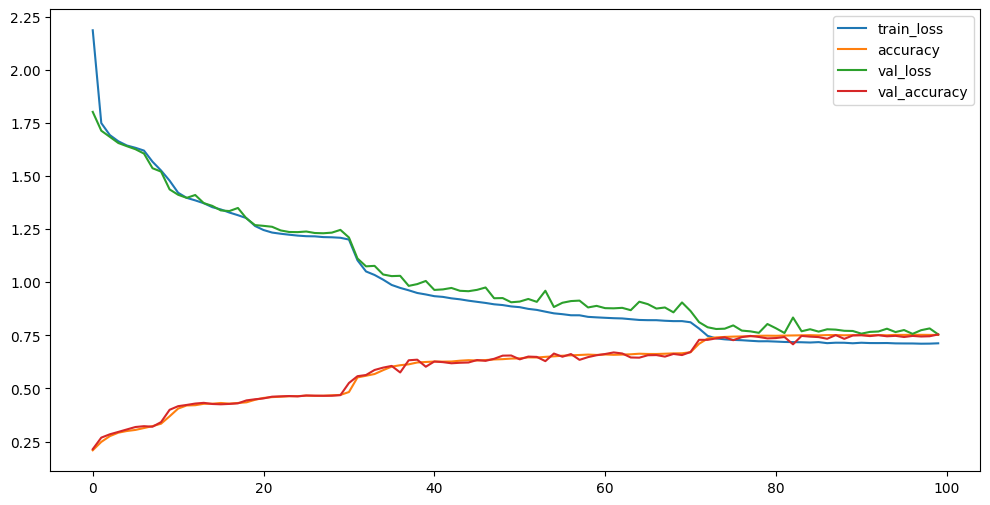

In [22]:
# Plot non-normalized data loss curves
plt.figure(figsize=(12, 6))
plt.plot(history_10.history['loss'], label='train_loss')
plt.plot(history_10.history['accuracy'], label='accuracy')
plt.plot(history_10.history['val_loss'], label='val_loss')
plt.plot(history_10.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show();

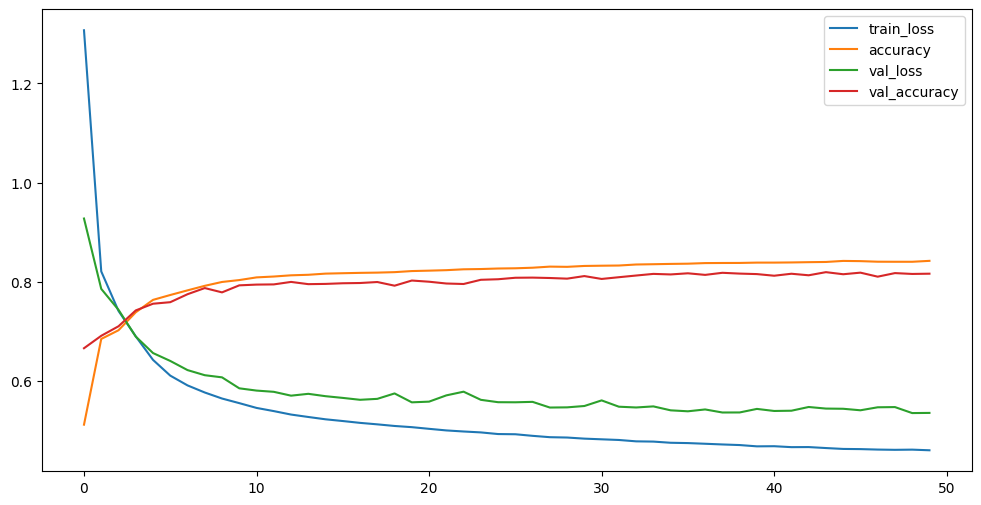

In [23]:
# Plot normalized data loss curves
plt.figure(figsize=(12, 6))
plt.plot(history_11.history['loss'], label='train_loss')
plt.plot(history_11.history['accuracy'], label='accuracy')
plt.plot(history_11.history['val_loss'], label='val_loss')
plt.plot(history_11.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show();